# Algorithm Performance Visualization

This notebook visualizes the results from all algorithm experiments: NSGA-II, GA, μ+λ, and SA.
It includes individual visualizations for each algorithm and comparative box plots.

## 1. Import Libraries

In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Data from Databases

In [2]:
# Load NSGA-II results
try:
    con = sqlite3.connect('../data/nsga2_experiments.db')
    df_nsga2 = pd.read_sql_query("SELECT * FROM runs", con)
    con.close()
    df_nsga2['algorithm'] = 'NSGA-II'
    df_nsga2['best_fitness'] = df_nsga2['best_tradeoff_penalized']
    print(f"✓ NSGA-II: {len(df_nsga2)} runs loaded")
except Exception as e:
    print(f"⚠ NSGA-II data not found: {e}")
    df_nsga2 = None

# Load GA results
try:
    con = sqlite3.connect('../data/ga_experiments.db')
    df_ga = pd.read_sql_query("SELECT * FROM runs", con)
    con.close()
    df_ga['algorithm'] = 'GA'
    df_ga['best_fitness'] = df_ga['best_penalized']
    print(f"✓ GA: {len(df_ga)} runs loaded")
except Exception as e:
    print(f"⚠ GA data not found: {e}")
    df_ga = None

# Load μ+λ results
try:
    con = sqlite3.connect('../data/mulambda_experiments.db')
    df_mulambda = pd.read_sql_query("SELECT * FROM runs", con)
    con.close()
    df_mulambda['algorithm'] = 'μ+λ'
    df_mulambda['best_fitness'] = df_mulambda['best_penalized']
    print(f"✓ μ+λ: {len(df_mulambda)} runs loaded")
except Exception as e:
    print(f"⚠ μ+λ data not found: {e}")
    df_mulambda = None

# Load SA results
try:
    con = sqlite3.connect('../data/sa_experiments.db')
    df_sa = pd.read_sql_query("SELECT * FROM runs", con)
    con.close()
    df_sa['algorithm'] = 'SA'
    df_sa['best_fitness'] = df_sa['best_penalized']
    print(f"✓ SA: {len(df_sa)} runs loaded")
except Exception as e:
    print(f"⚠ SA data not found: {e}")
    df_sa = None

✓ NSGA-II: 31 runs loaded
✓ GA: 31 runs loaded
✓ μ+λ: 31 runs loaded
✓ SA: 31 runs loaded


## 3. NSGA-II Visualizations

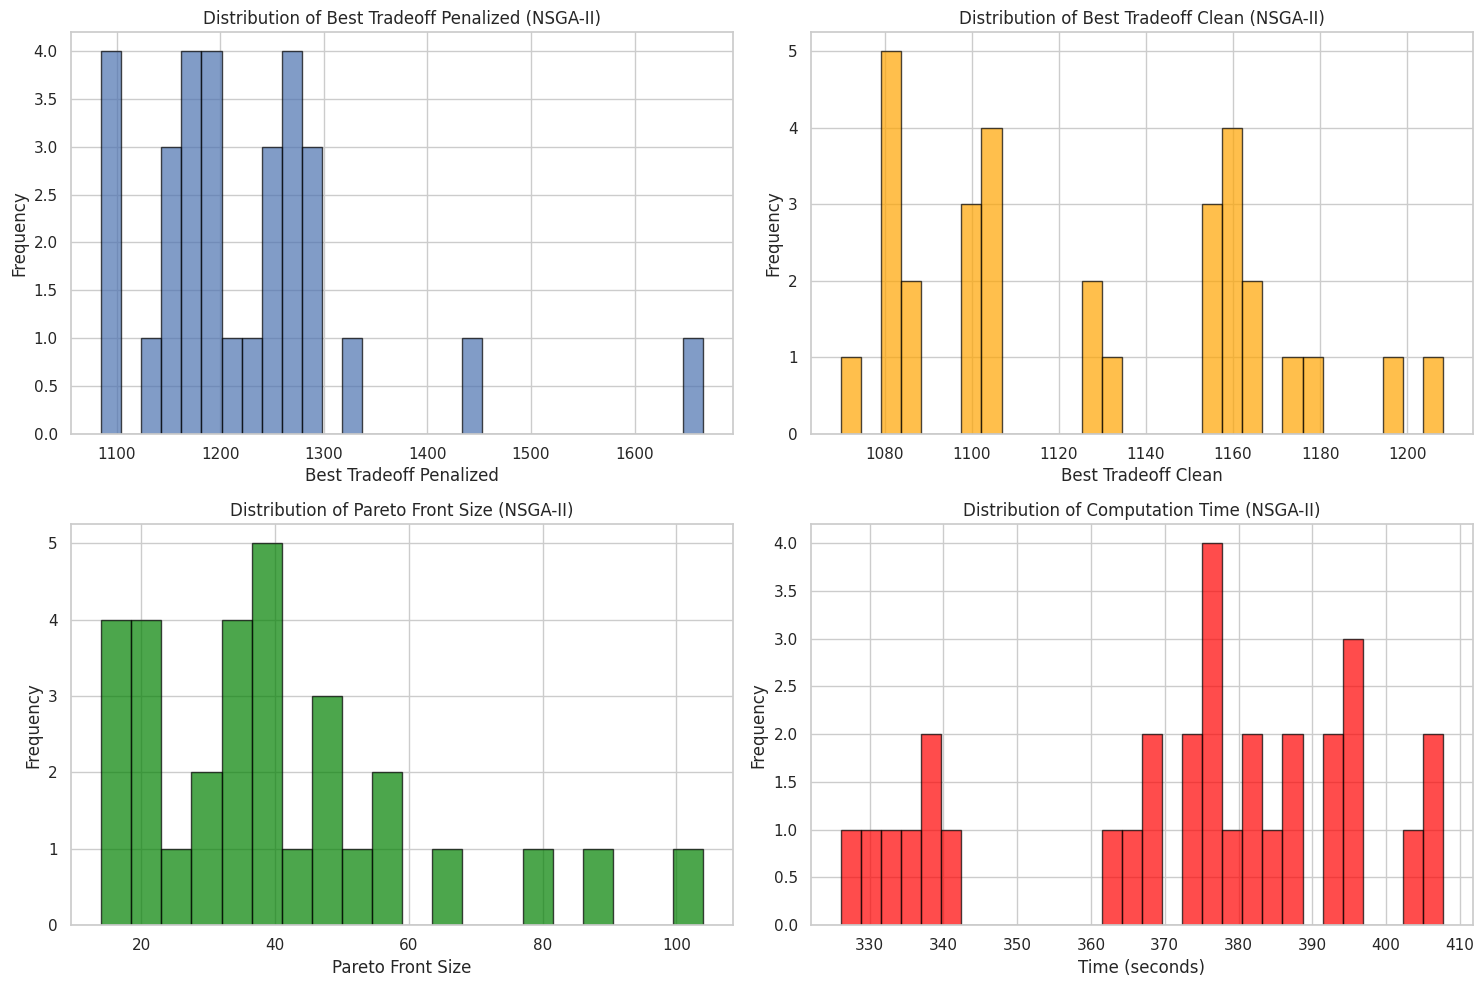


=== NSGA-II Summary Statistics ===
       best_tradeoff_penalized  best_tradeoff_clean  pareto_size    time_sec
count                31.000000            31.000000    31.000000   31.000000
mean               1227.073751          1127.301170    40.193548  372.617273
std                 113.013700            39.907912    21.519633   23.741427
min                1084.979797          1069.979797    14.000000  326.105281
25%                1163.918758          1091.722438    24.000000  365.282333
50%                1198.671933          1126.435642    37.000000  377.127820
75%                1268.507214          1160.506709    48.000000  389.577781
max                1666.270923          1208.193001   104.000000  407.719884


In [4]:
if df_nsga2 is not None:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Distribution of best tradeoff penalized
    axes[0, 0].hist(df_nsga2['best_tradeoff_penalized'], bins=30, edgecolor='black', alpha=0.7)
    axes[0, 0].set_title('Distribution of Best Tradeoff Penalized (NSGA-II)')
    axes[0, 0].set_xlabel('Best Tradeoff Penalized')
    axes[0, 0].set_ylabel('Frequency')
    
    # 2. Distribution of best tradeoff clean
    axes[0, 1].hist(df_nsga2['best_tradeoff_clean'], bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[0, 1].set_title('Distribution of Best Tradeoff Clean (NSGA-II)')
    axes[0, 1].set_xlabel('Best Tradeoff Clean')
    axes[0, 1].set_ylabel('Frequency')
    
    # 3. Pareto size distribution
    axes[1, 0].hist(df_nsga2['pareto_size'], bins=20, edgecolor='black', alpha=0.7, color='green')
    axes[1, 0].set_title('Distribution of Pareto Front Size (NSGA-II)')
    axes[1, 0].set_xlabel('Pareto Front Size')
    axes[1, 0].set_ylabel('Frequency')
    
    # 4. Computation time distribution
    axes[1, 1].hist(df_nsga2['time_sec'], bins=30, edgecolor='black', alpha=0.7, color='red')
    axes[1, 1].set_title('Distribution of Computation Time (NSGA-II)')
    axes[1, 1].set_xlabel('Time (seconds)')
    axes[1, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('../plots/individual/nsga2_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n=== NSGA-II Summary Statistics ===")
    print(df_nsga2[['best_tradeoff_penalized', 'best_tradeoff_clean', 'pareto_size', 'time_sec']].describe())
else:
    print("⚠ NSGA-II data not available for visualization")

## 4. GA Visualizations

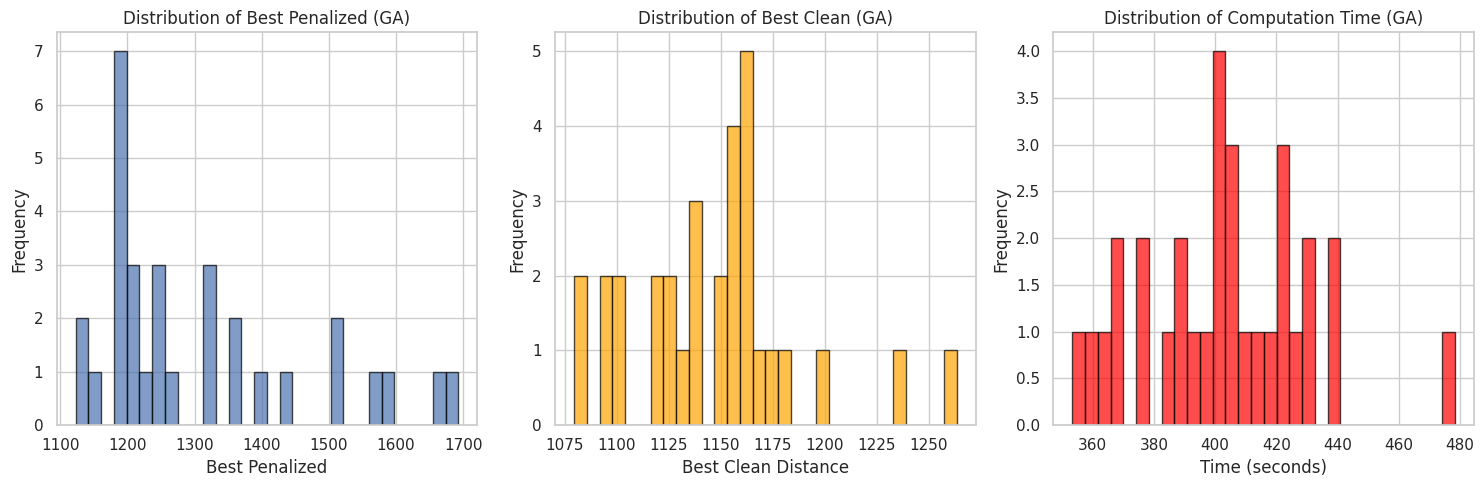


=== GA Summary Statistics ===
       best_penalized   best_clean    time_sec
count       31.000000    31.000000   31.000000
mean      1311.741928  1146.932251  403.002264
std        160.116293    40.996160   27.292073
min       1123.086147  1079.322943  353.345724
25%       1190.882972  1122.358477  385.860778
50%       1244.485642  1152.406204  402.840836
75%       1379.066738  1162.485894  421.605022
max       1692.486147  1263.335137  478.427849


In [5]:
if df_ga is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Distribution of best penalized
    axes[0].hist(df_ga['best_penalized'], bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Best Penalized (GA)')
    axes[0].set_xlabel('Best Penalized')
    axes[0].set_ylabel('Frequency')
    
    # 2. Distribution of best clean
    axes[1].hist(df_ga['best_clean'], bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_title('Distribution of Best Clean (GA)')
    axes[1].set_xlabel('Best Clean Distance')
    axes[1].set_ylabel('Frequency')
    
    # 3. Computation time distribution
    axes[2].hist(df_ga['time_sec'], bins=30, edgecolor='black', alpha=0.7, color='red')
    axes[2].set_title('Distribution of Computation Time (GA)')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('../plots/individual/ga_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n=== GA Summary Statistics ===")
    print(df_ga[['best_penalized', 'best_clean', 'time_sec']].describe())
else:
    print("⚠ GA data not available for visualization")

## 5. μ+λ Visualizations

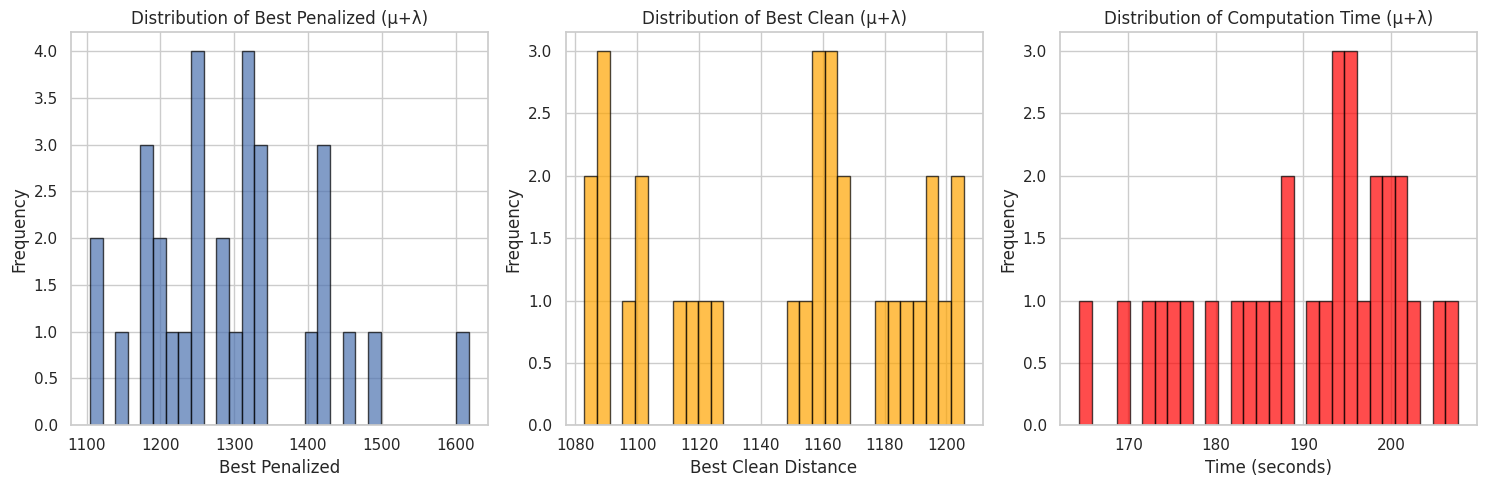


=== μ+λ Summary Statistics ===
       best_penalized   best_clean    time_sec
count       31.000000    31.000000   31.000000
mean      1294.012814  1146.819266  189.916880
std        115.992690    40.810402   11.279334
min       1104.658730  1082.908730  164.358011
25%       1212.210642  1106.536147  183.484284
50%       1277.878282  1157.435642  193.999183
75%       1340.499603  1181.228535  198.049761
max       1618.243506  1205.577777  207.683865


In [6]:
if df_mulambda is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Distribution of best penalized
    axes[0].hist(df_mulambda['best_penalized'], bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Best Penalized (μ+λ)')
    axes[0].set_xlabel('Best Penalized')
    axes[0].set_ylabel('Frequency')
    
    # 2. Distribution of best clean
    axes[1].hist(df_mulambda['best_clean'], bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_title('Distribution of Best Clean (μ+λ)')
    axes[1].set_xlabel('Best Clean Distance')
    axes[1].set_ylabel('Frequency')
    
    # 3. Computation time distribution
    axes[2].hist(df_mulambda['time_sec'], bins=30, edgecolor='black', alpha=0.7, color='red')
    axes[2].set_title('Distribution of Computation Time (μ+λ)')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('../plots/individual/mulambda_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n=== μ+λ Summary Statistics ===")
    print(df_mulambda[['best_penalized', 'best_clean', 'time_sec']].describe())
else:
    print("⚠ μ+λ data not available for visualization")

## 6. SA Visualizations

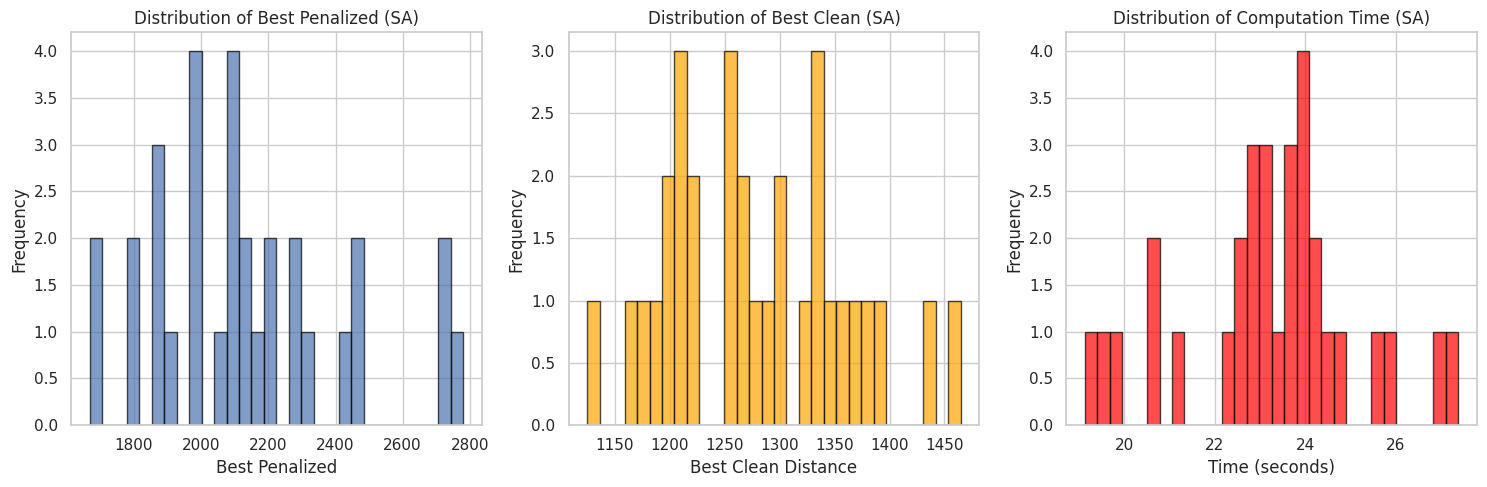


=== SA Summary Statistics ===
       best_penalized   best_clean   time_sec
count       31.000000    31.000000  31.000000
mean      2135.029709  1279.458741  23.235021
std        288.186522    82.999145   1.945450
min       1668.135642  1124.979797  19.136516
25%       1945.340223  1212.876767  22.585981
50%       2108.298340  1271.518903  23.428403
75%       2286.579942  1336.388960  24.106026
max       2779.871428  1464.785930  27.376400


In [7]:
if df_sa is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. Distribution of best penalized
    axes[0].hist(df_sa['best_penalized'], bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_title('Distribution of Best Penalized (SA)')
    axes[0].set_xlabel('Best Penalized')
    axes[0].set_ylabel('Frequency')
    
    # 2. Distribution of best clean
    axes[1].hist(df_sa['best_clean'], bins=30, edgecolor='black', alpha=0.7, color='orange')
    axes[1].set_title('Distribution of Best Clean (SA)')
    axes[1].set_xlabel('Best Clean Distance')
    axes[1].set_ylabel('Frequency')
    
    # 3. Computation time distribution
    axes[2].hist(df_sa['time_sec'], bins=30, edgecolor='black', alpha=0.7, color='red')
    axes[2].set_title('Distribution of Computation Time (SA)')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.savefig('../plots/individual/sa_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n=== SA Summary Statistics ===")
    print(df_sa[['best_penalized', 'best_clean', 'time_sec']].describe())
else:
    print("⚠ SA data not available for visualization")

## 7. Combined Comparison - Box Plots

In [8]:
# Combine all datasets
dfs = []
if df_nsga2 is not None:
    dfs.append(df_nsga2[['algorithm', 'best_fitness', 'best_clean', 'time_sec']])
if df_ga is not None:
    dfs.append(df_ga[['algorithm', 'best_fitness', 'best_clean', 'time_sec']])
if df_mulambda is not None:
    dfs.append(df_mulambda[['algorithm', 'best_fitness', 'best_clean', 'time_sec']])
if df_sa is not None:
    dfs.append(df_sa[['algorithm', 'best_fitness', 'best_clean', 'time_sec']])

if len(dfs) > 0:
    df_combined = pd.concat(dfs, ignore_index=True)
    print(f"✓ Combined dataset: {len(df_combined)} total runs from {len(dfs)} algorithms")
else:
    print("⚠ No data available for combined analysis")
    df_combined = None

✓ Combined dataset: 124 total runs from 4 algorithms


/tmp/ipykernel_28274/1525316536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='algorithm', y='best_fitness', ax=axes[0], palette='Set2')
/tmp/ipykernel_28274/1525316536.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='algorithm', y='best_clean', ax=axes[1], palette='Set3')
/tmp/ipykernel_28274/1525316536.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='algorithm', y='time_sec', ax=axes[2], palette='Pastel1')


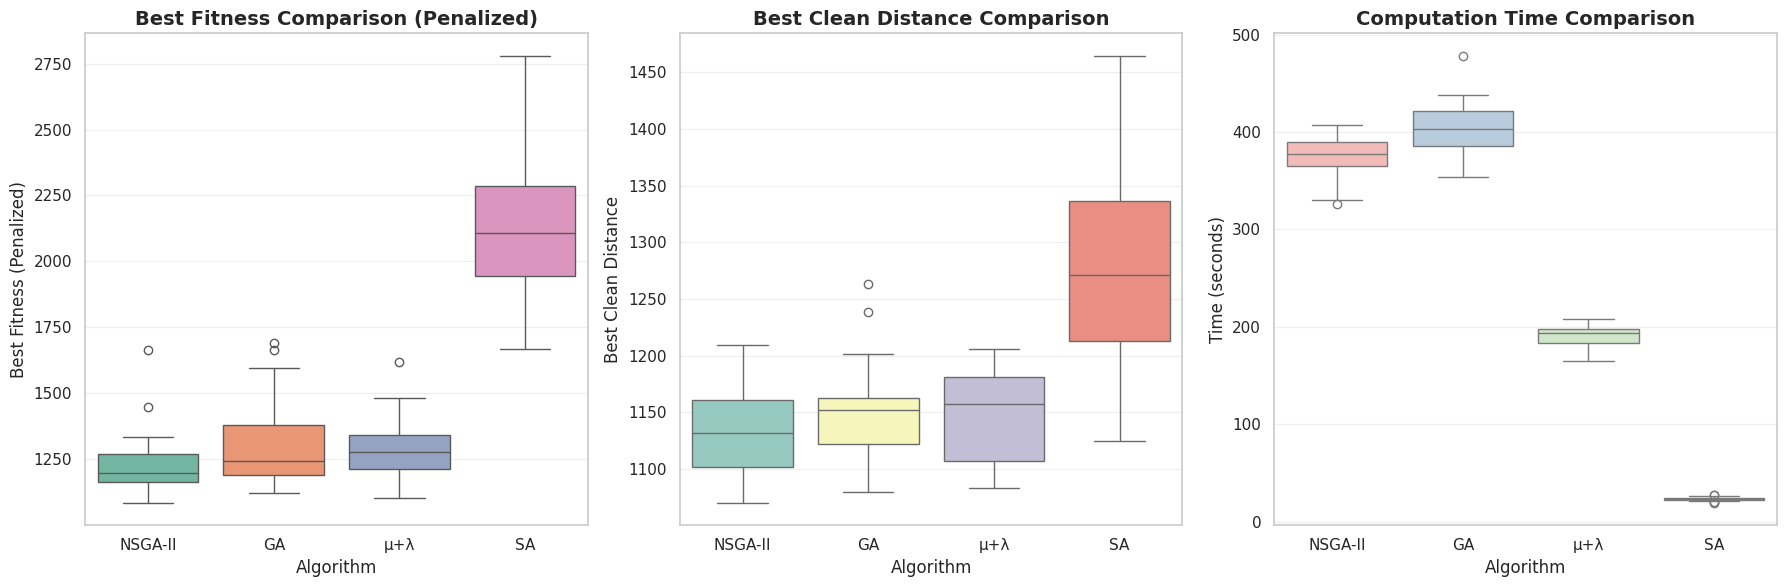

✓ Combined box plots generated and saved


In [9]:
if df_combined is not None:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Box plot for Best Fitness (Penalized)
    sns.boxplot(data=df_combined, x='algorithm', y='best_fitness', ax=axes[0], palette='Set2')
    axes[0].set_title('Best Fitness Comparison (Penalized)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Algorithm', fontsize=12)
    axes[0].set_ylabel('Best Fitness (Penalized)', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)
    
    # 2. Box plot for Best Clean Distance
    sns.boxplot(data=df_combined, x='algorithm', y='best_clean', ax=axes[1], palette='Set3')
    axes[1].set_title('Best Clean Distance Comparison', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Algorithm', fontsize=12)
    axes[1].set_ylabel('Best Clean Distance', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)
    
    # 3. Box plot for Computation Time
    sns.boxplot(data=df_combined, x='algorithm', y='time_sec', ax=axes[2], palette='Pastel1')
    axes[2].set_title('Computation Time Comparison', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Algorithm', fontsize=12)
    axes[2].set_ylabel('Time (seconds)', fontsize=12)
    axes[2].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../plots/combined/combined_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Combined box plots generated and saved")
else:
    print("⚠ Cannot create combined box plots - no data available")

## 8. Statistical Comparison Table

In [10]:
if df_combined is not None:
    # Create summary table
    summary = df_combined.groupby('algorithm').agg({
        'best_fitness': ['mean', 'std', 'min', 'max'],
        'best_clean': ['mean', 'std', 'min', 'max'],
        'time_sec': ['mean', 'std', 'min', 'max']
    }).round(3)
    
    summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
    
    print("\n" + "="*100)
    print("STATISTICAL COMPARISON OF ALL ALGORITHMS")
    print("="*100)
    print(summary)
    
    # Save to CSV
    summary.to_csv('../results/combined/algorithms_comparison.csv')
    print("\n✓ Comparison table saved to algorithms_comparison.csv")
else:
    print("⚠ Cannot create comparison table - no data available")


STATISTICAL COMPARISON OF ALL ALGORITHMS
           best_fitness_mean  best_fitness_std  best_fitness_min  \
algorithm                                                          
GA                  1311.742           160.116          1123.086   
NSGA-II             1227.074           113.014          1084.980   
SA                  2135.030           288.187          1668.136   
μ+λ                 1294.013           115.993          1104.659   

           best_fitness_max  best_clean_mean  best_clean_std  best_clean_min  \
algorithm                                                                      
GA                 1692.486         1146.932          40.996        1079.323   
NSGA-II            1666.271         1133.899          40.509        1069.980   
SA                 2779.871         1279.459          82.999        1124.980   
μ+λ                1618.244         1146.819          40.810        1082.909   

           best_clean_max  time_sec_mean  time_sec_std  time_sec_min

## 9. Statistical Tests (ANOVA or Kruskal-Wallis)

In [11]:
if df_combined is not None and len(df_combined['algorithm'].unique()) > 1:
    print("\n" + "="*100)
    print("STATISTICAL SIGNIFICANCE TESTS")
    print("="*100)
    
    # Test for normality (Shapiro-Wilk) for each algorithm
    print("\n--- Normality Tests (Shapiro-Wilk) ---")
    for algo in df_combined['algorithm'].unique():
        data = df_combined[df_combined['algorithm'] == algo]['best_fitness']
        if len(data) >= 3:
            stat, p = stats.shapiro(data)
            print(f"{algo}: p-value = {p:.4f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")
    
    # Kruskal-Wallis test (non-parametric alternative to ANOVA)
    print("\n--- Kruskal-Wallis Test (Best Fitness) ---")
    groups = [df_combined[df_combined['algorithm'] == algo]['best_fitness'].values 
              for algo in df_combined['algorithm'].unique()]
    stat, p = stats.kruskal(*groups)
    print(f"H-statistic = {stat:.4f}")
    print(f"p-value = {p:.4f}")
    if p < 0.05:
        print("✓ There are significant differences between algorithms (α=0.05)")
    else:
        print("⨯ No significant differences found between algorithms (α=0.05)")
    
    # Pairwise comparisons (Mann-Whitney U test)
    print("\n--- Pairwise Comparisons (Mann-Whitney U Test) ---")
    algorithms = df_combined['algorithm'].unique()
    for i in range(len(algorithms)):
        for j in range(i+1, len(algorithms)):
            algo1, algo2 = algorithms[i], algorithms[j]
            data1 = df_combined[df_combined['algorithm'] == algo1]['best_fitness'].values
            data2 = df_combined[df_combined['algorithm'] == algo2]['best_fitness'].values
            stat, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
            print(f"{algo1} vs {algo2}: U={stat:.1f}, p-value={p:.4f} {'*' if p < 0.05 else ''}")
else:
    print("⚠ Cannot perform statistical tests - insufficient data")


STATISTICAL SIGNIFICANCE TESTS

--- Normality Tests (Shapiro-Wilk) ---
NSGA-II: p-value = 0.0001 (Not Normal)
GA: p-value = 0.0009 (Not Normal)
μ+λ: p-value = 0.3801 (Normal)
SA: p-value = 0.1545 (Normal)

--- Kruskal-Wallis Test (Best Fitness) ---
H-statistic = 73.3231
p-value = 0.0000
✓ There are significant differences between algorithms (α=0.05)

--- Pairwise Comparisons (Mann-Whitney U Test) ---
NSGA-II vs GA: U=332.0, p-value=0.0372 *
NSGA-II vs μ+λ: U=291.0, p-value=0.0078 *
NSGA-II vs SA: U=0.0, p-value=0.0000 *
GA vs μ+λ: U=477.0, p-value=0.9663 
GA vs SA: U=2.0, p-value=0.0000 *
μ+λ vs SA: U=0.0, p-value=0.0000 *


## 10. Violin Plots (Alternative Visualization)

/tmp/ipykernel_28274/160979793.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='algorithm', y='best_fitness', ax=axes[0], palette='muted')
/tmp/ipykernel_28274/160979793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_combined, x='algorithm', y='best_clean', ax=axes[1], palette='muted')


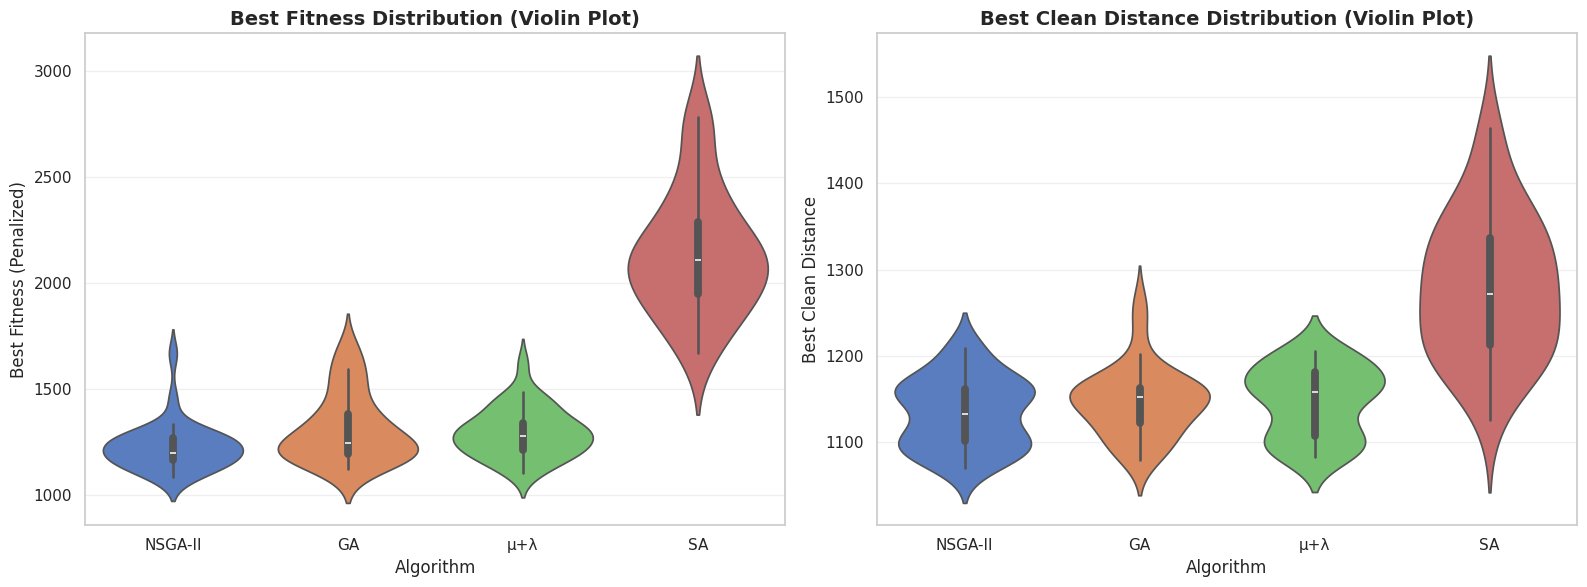

✓ Violin plots generated and saved


In [12]:
if df_combined is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Violin plot for Best Fitness
    sns.violinplot(data=df_combined, x='algorithm', y='best_fitness', ax=axes[0], palette='muted')
    axes[0].set_title('Best Fitness Distribution (Violin Plot)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Algorithm', fontsize=12)
    axes[0].set_ylabel('Best Fitness (Penalized)', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Violin plot for Best Clean
    sns.violinplot(data=df_combined, x='algorithm', y='best_clean', ax=axes[1], palette='muted')
    axes[1].set_title('Best Clean Distance Distribution (Violin Plot)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Algorithm', fontsize=12)
    axes[1].set_ylabel('Best Clean Distance', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../plots/combined/combined_violinplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Violin plots generated and saved")
else:
    print("⚠ Cannot create violin plots - no data available")

## 11. Performance vs Computation Time

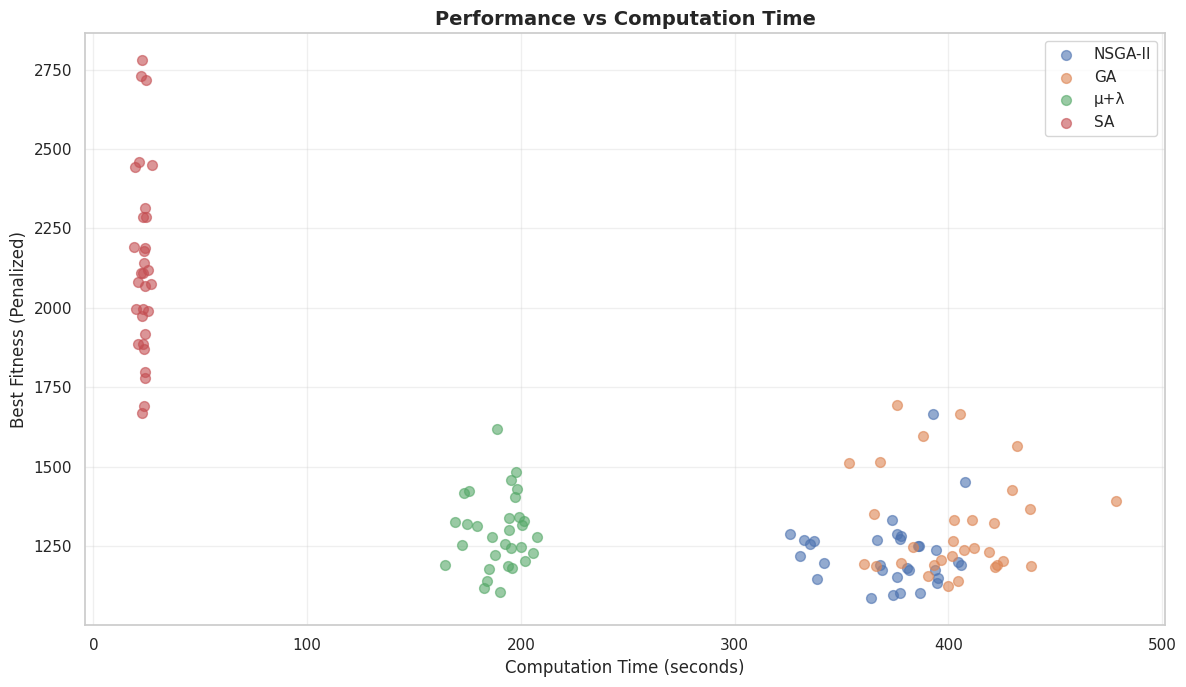

✓ Performance vs time plot generated and saved


In [13]:
if df_combined is not None:
    plt.figure(figsize=(12, 7))
    
    for algo in df_combined['algorithm'].unique():
        data = df_combined[df_combined['algorithm'] == algo]
        plt.scatter(data['time_sec'], data['best_fitness'], 
                   label=algo, alpha=0.6, s=50)
    
    plt.xlabel('Computation Time (seconds)', fontsize=12)
    plt.ylabel('Best Fitness (Penalized)', fontsize=12)
    plt.title('Performance vs Computation Time', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../plots/combined/performance_vs_time.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Performance vs time plot generated and saved")
else:
    print("⚠ Cannot create scatter plot - no data available")

## 12. Export Combined Results

In [14]:
if df_combined is not None:
    df_combined.to_csv('../results/combined/all_algorithms_combined.csv', index=False)
    print("✓ Combined results exported to all_algorithms_combined.csv")
else:
    print("⚠ No data to export")

✓ Combined results exported to all_algorithms_combined.csv
